In [44]:
import pandas as pd
from pandas import datetime

<ipython-input-44-40c3a241daed>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [71]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales = pd.read_csv('sales-cars.csv',date_parser=parser,parse_dates=[0],index_col=0)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [72]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [47]:
sales.Month[0]

AttributeError: 'DataFrame' object has no attribute 'Month'

In [48]:
sales.shape

(36, 1)

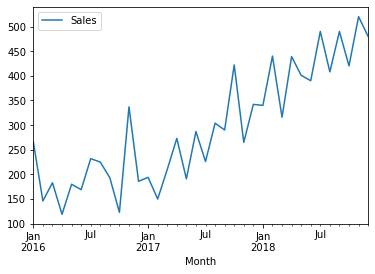

In [49]:
sales.plot()

In [50]:
sales.corr()

,Sales
Sales,1.0


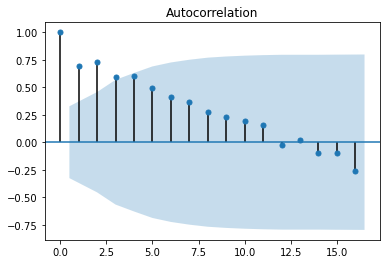

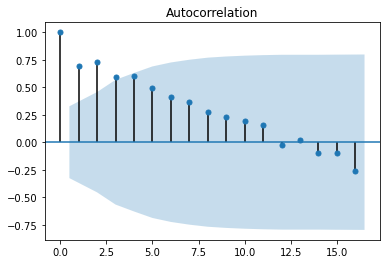

In [51]:
# Statinarity means the mean, variance and correlation is constant over a time period
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [52]:
sales_diff = sales.diff(periods=1)
sales_diff

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0


In [53]:
sales

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180
2016-06-01,169
2016-07-01,232
2016-08-01,225
2016-09-01,193


In [54]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


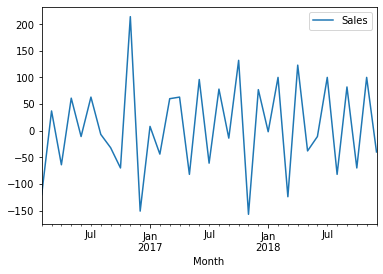

In [55]:
sales_diff.plot()


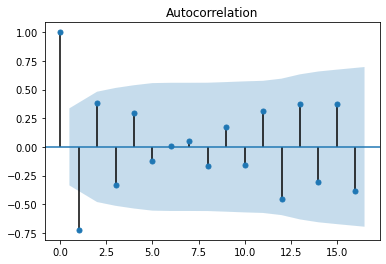

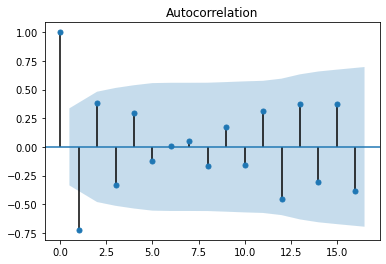

In [56]:
plot_acf(sales_diff[1:])

In [57]:
X = sales.values
train = X[0:27]
test =X[27:]
predictions = []

In [73]:
X

array([[266],
       [146],
       [183],
       [119],
       [180],
       [169],
       [232],
       [225],
       [193],
       [123],
       [337],
       [186],
       [194],
       [150],
       [210],
       [273],
       [191],
       [287],
       [226],
       [304],
       [290],
       [422],
       [265],
       [342],
       [340],
       [440],
       [316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

In [58]:
test.shape

(9, 1)

In [59]:
#AR Model

In [60]:
from statsmodels.tsa.ar_model import AR
model_ar = AR(train)
model_ar_fit = model_ar.fit()

C:\Users\91950\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [61]:
predictions = model_ar_fit.predict(start=27,end=35)

In [62]:
predictions

array([398.22922886, 368.27242294, 429.47485941, 379.17750391,
       431.35262347, 399.90234723, 433.3589338 , 418.74469463,
       453.45711544])

In [63]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

In [64]:
import matplotlib.pyplot as plt

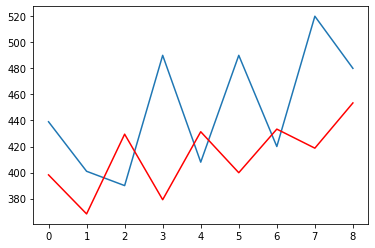

In [65]:
plt.plot(test)
plt.plot(predictions,color='red')

# ARIMA Model

In [66]:
from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(train,order=(3,1,0)) # p d q (past,int,errors)
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

294.85435842188093


In [67]:
predictions = model_arima_fit.forecast(steps=9)[0]

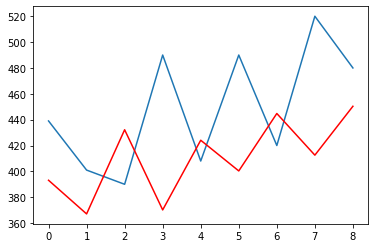

In [68]:
plt.plot(test)
plt.plot(predictions,color='red')

In [74]:
predictions

array([393.12495529, 367.08455375, 432.19177617, 370.18124353,
       424.07811544, 400.33353488, 444.76789798, 412.54163992,
       450.35938703])

In [75]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

In [76]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [80]:
import warnings
warnings.filterwarnings('ignore')
for parameter in pdq:
    try:
        model_arima = ARIMA(train,order=parameter)
        model_arima_fit = model_arima.fit()
        print(parameter,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093849175
(0, 0, 2) 315.25060028714825
(0, 0, 3) nan
(0, 0, 4) 310.166932857709
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530475545
(0, 1, 2) 296.3229226908145
(0, 1, 3) 298.31202117389375
(0, 1, 4) 300.3393975617849
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019462652316
(0, 2, 2) 290.3983401127721
(0, 2, 3) 292.98589627472575
(1, 0, 0) 316.1668717522325
(1, 0, 1) 313.04871744036456
(1, 0, 2) 310.97906422217216
(1, 0, 4) 309.6779931153488
(1, 1, 0) 298.8325442270912
(1, 1, 1) 297.1256511258498
(1, 1, 2) 299.47166670626694
(1, 1, 3) 301.2851180948316
(1, 1, 4) 299.9787323971052
(1, 2, 0) 306.53077675709596
(1, 2, 3) 290.3253393560523
(2, 0, 0) 310.99695736453157
(2, 0, 1) 568.5752158018337
(2, 1, 0) 300.2089561240046
(2, 1, 1) 297.9999930167495
(2, 1, 2) 298.5505428130431
(2, 1, 3) 302.87208212904625
(2, 2, 0) 306.29758564323095
(3, 0, 0) 312.9838587433959
(3, 0, 1) 335.4680512600713
(3, 0, 4) 310.31327217775333
(3, 1, 0) 294.85435842